In [27]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=206422225903a0a4db3d6895aaa5a48f' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730732400,
            "main": {
                "temp": 286.76,
                "feels_like": 286.32,
                "temp_min": 286.76,
                "temp_max": 286.78,
                "pressure": 1025,
                "sea_level": 1025,
                "grnd_level": 957,
                "humidity": 82,
                "temp_kf": -0.02
            },
            "weather": [
                {
                    "id": 800,
                    "main": "Clear",
                    "description": "clear sky",
                    "icon": "01d"
                }
            ],
            "clouds": {
                "all": 0
            },
            "wind": {
                "speed": 1.43,
                "deg": 47,
                "gust": 1.76
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
            "

In [29]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-11-04 15:00:00'

In [30]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']

    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head(10)


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,286.76,82,1.43,clear sky,2024-11-04 15:00:00,2024-11-04,15:00:00
1,285.58,86,1.32,clear sky,2024-11-04 18:00:00,2024-11-04,18:00:00
2,283.85,88,1.36,clear sky,2024-11-04 21:00:00,2024-11-04,21:00:00
3,281.73,87,1.40,clear sky,2024-11-05 00:00:00,2024-11-05,00:00:00
4,281.28,83,1.41,overcast clouds,2024-11-05 03:00:00,2024-11-05,03:00:00
5,280.79,81,1.53,overcast clouds,2024-11-05 06:00:00,2024-11-05,06:00:00
6,285.55,71,0.64,broken clouds,2024-11-05 09:00:00,2024-11-05,09:00:00
7,287.28,68,1.78,overcast clouds,2024-11-05 12:00:00,2024-11-05,12:00:00
8,285.36,86,1.26,overcast clouds,2024-11-05 15:00:00,2024-11-05,15:00:00
9,282.62,93,1.09,overcast clouds,2024-11-05 18:00:00,2024-11-05,18:00:00


In [31]:
data_df.shape

(40, 7)

In [32]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [33]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


In [34]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,282.646000,85.550000,1.266250
std,2.296471,8.533343,0.309381
min,279.580000,65.000000,0.470000
25%,280.745000,82.000000,1.087500
50%,281.940000,86.500000,1.250000
75%,284.552500,92.250000,1.415000
max,287.280000,96.000000,1.990000


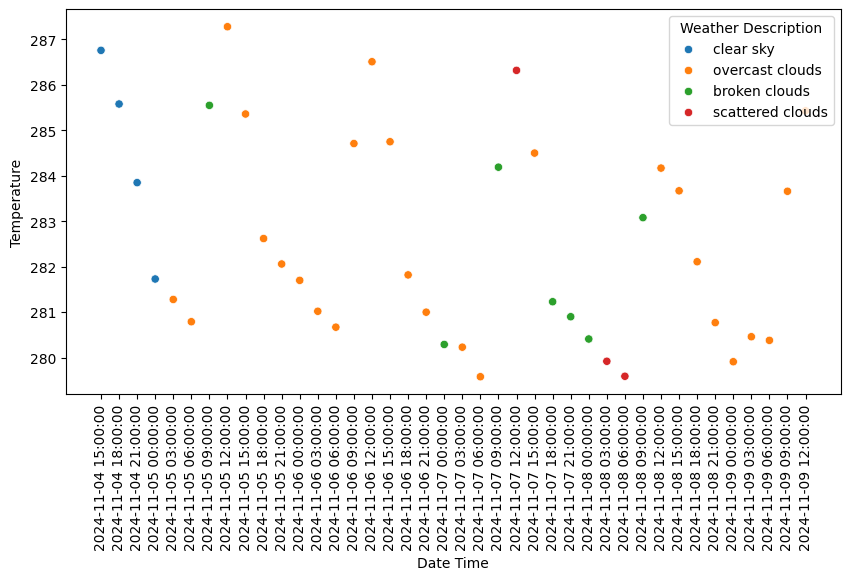

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

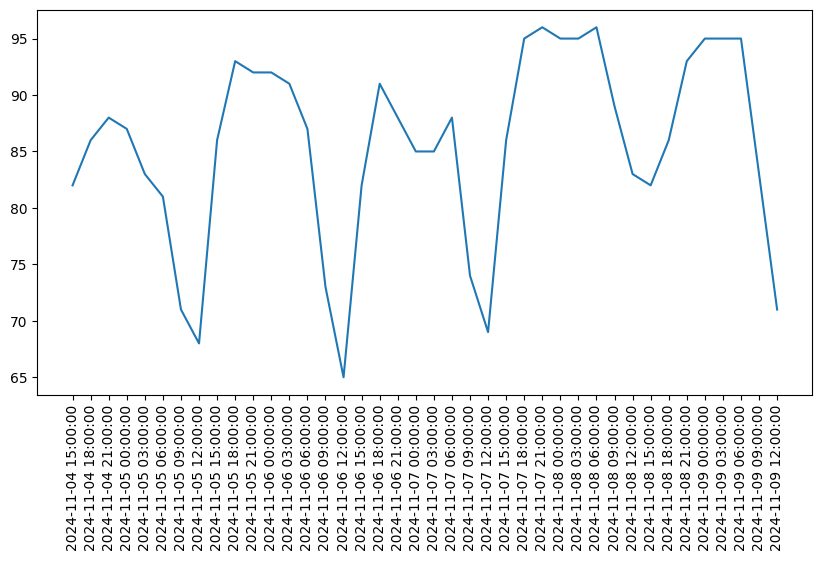

In [36]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Humidity'])
plt.xticks(rotation=90);

In [37]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-04,285.396667,1.37000
2024-11-05,283.333750,1.29375
2024-11-06,282.772500,1.24250
2024-11-07,282.155000,1.37625
2024-11-08,281.715000,1.11250
2024-11-09,281.968000,1.26800


<Axes: >

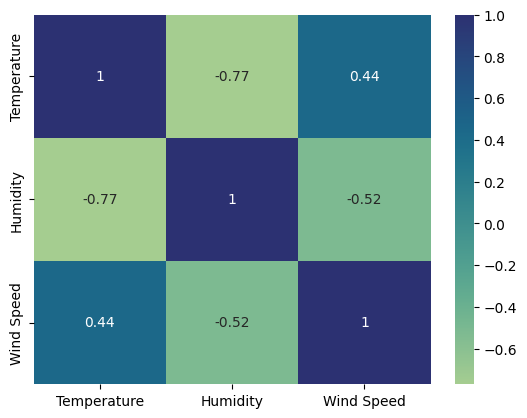

In [38]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')